In [1]:
%matplotlib inline

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import collections.abc
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
with open('data/alice.txt', 'r', encoding='utf-8') as file:
    alice = file.read()

In [4]:
alice

"\n\n\nProject Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice's Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nRelease Date: June 25, 2008 [EBook #11]\nLast Updated: October 6, 2016\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***\n\n\n\nProduced by Arthur DiBianca and David Widger\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nALICE’S ADVENTURES\nIN WONDERLAND\n\n\nBy Lewis Carroll\n\n\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\n\nContents\nCHAPTER I. \tDown the Rabbit-Hole\nCHAPTER II. \tThe Pool of Tears\nCHAPTER III. \tA Caucus-Race and a Long Tale\nCHAPTER IV. \tThe Rabbit Sends in a Little Bill\nCHAPTER V. \tAdvic

In [5]:
print(alice)




Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Release Date: June 25, 2008 [EBook #11]
Last Updated: October 6, 2016

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***



Produced by Arthur DiBianca and David Widger

















ALICE’S ADVENTURES
IN WONDERLAND


By Lewis Carroll



THE MILLENNIUM FULCRUM EDITION 3.0





Contents
CHAPTER I. 	Down the Rabbit-Hole
CHAPTER II. 	The Pool of Tears
CHAPTER III. 	A Caucus-Race and a Long Tale
CHAPTER IV. 	The Rabbit Sends in a Little Bill
CHAPTER V. 	Advice from a Caterpillar
CHAPTER VI. 	Pig and Pepper
CHAPTER VII. 	A Mad 

In [6]:
alice_word = [word for word in re.split('\W+', alice) if word != '']

In [7]:
alice_word

['Project',
 'Gutenberg',
 's',
 'Alice',
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 'This',
 'eBook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'You',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'Project',
 'Gutenberg',
 'License',
 'included',
 'with',
 'this',
 'eBook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'org',
 'Title',
 'Alice',
 's',
 'Adventures',
 'in',
 'Wonderland',
 'Author',
 'Lewis',
 'Carroll',
 'Release',
 'Date',
 'June',
 '25',
 '2008',
 'EBook',
 '11',
 'Last',
 'Updated',
 'October',
 '6',
 '2016',
 'Language',
 'English',
 'Character',
 'set',
 'encoding',
 'UTF',
 '8',
 'START',
 'OF',
 'THIS',
 'PROJECT',
 'GUTENBERG',
 'EBOOK',
 'ALICE',
 'S',
 'ADVENTURES',
 'IN',
 'WONDERLAND',
 'Produced',
 'by',
 'Arthur',
 'DiBianca',
 'and',
 'Da

we can use dictionary to count all words

In [8]:
alice_counter = {}
for word in alice_word:
    if word in alice_counter:
        alice_counter [word] += 1
    else:
        alice_counter [word] = 1

alice_counter 

{'Project': 83,
 'Gutenberg': 83,
 's': 214,
 'Alice': 401,
 'Adventures': 5,
 'in': 416,
 'Wonderland': 5,
 'by': 75,
 'Lewis': 4,
 'Carroll': 4,
 'This': 22,
 'eBook': 6,
 'is': 131,
 'for': 161,
 'the': 1693,
 'use': 28,
 'of': 609,
 'anyone': 5,
 'anywhere': 3,
 'at': 218,
 'no': 78,
 'cost': 4,
 'and': 875,
 'with': 223,
 'almost': 8,
 'restrictions': 2,
 'whatsoever': 2,
 'You': 67,
 'may': 26,
 'copy': 12,
 'it': 543,
 'give': 12,
 'away': 28,
 'or': 148,
 're': 40,
 'under': 21,
 'terms': 20,
 'License': 10,
 'included': 3,
 'this': 154,
 'online': 4,
 'www': 6,
 'gutenberg': 6,
 'org': 13,
 'Title': 1,
 'Author': 1,
 'Release': 1,
 'Date': 1,
 'June': 1,
 '25': 1,
 '2008': 1,
 'EBook': 1,
 '11': 4,
 'Last': 2,
 'Updated': 2,
 'October': 1,
 '6': 3,
 '2016': 1,
 'Language': 1,
 'English': 7,
 'Character': 1,
 'set': 23,
 'encoding': 1,
 'UTF': 1,
 '8': 5,
 'START': 2,
 'OF': 11,
 'THIS': 5,
 'PROJECT': 4,
 'GUTENBERG': 4,
 'EBOOK': 2,
 'ALICE': 3,
 'S': 8,
 'ADVENTURES': 3,
 'I

We can use Counter function (from collection import Counter) to count all words. It does the same thing.

In [9]:
alice_counter_2 = collections.Counter(alice_word)
alice_counter_2

Counter({'Project': 83,
         'Gutenberg': 83,
         's': 214,
         'Alice': 401,
         'Adventures': 5,
         'in': 416,
         'Wonderland': 5,
         'by': 75,
         'Lewis': 4,
         'Carroll': 4,
         'This': 22,
         'eBook': 6,
         'is': 131,
         'for': 161,
         'the': 1693,
         'use': 28,
         'of': 609,
         'anyone': 5,
         'anywhere': 3,
         'at': 218,
         'no': 78,
         'cost': 4,
         'and': 875,
         'with': 223,
         'almost': 8,
         'restrictions': 2,
         'whatsoever': 2,
         'You': 67,
         'may': 26,
         'copy': 12,
         'it': 543,
         'give': 12,
         'away': 28,
         'or': 148,
         're': 40,
         'under': 21,
         'terms': 20,
         'License': 10,
         'included': 3,
         'this': 154,
         'online': 4,
         'www': 6,
         'gutenberg': 6,
         'org': 13,
         'Title': 1,
         'Author': 1,

In [10]:
alice_counter_2.most_common(10)

[('the', 1693),
 ('and', 875),
 ('to', 802),
 ('a', 677),
 ('of', 609),
 ('I', 546),
 ('it', 543),
 ('she', 513),
 ('said', 458),
 ('in', 416)]

<BarContainer object of 100 artists>

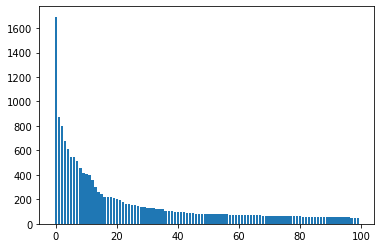

In [11]:
most_common_counts = [pair[1] for pair in alice_counter_2.most_common(100)]
plt.bar(range(len(most_common_counts)), most_common_counts)

In [12]:
most_common_characters = [pair[1] for pair in collections.Counter(alice).most_common(20)]
most_common_characters

[29580,
 15243,
 11754,
 9348,
 9172,
 7926,
 7881,
 7669,
 7054,
 6481,
 5275,
 5111,
 3926,
 2843,
 2766,
 2725,
 2566,
 2489,
 2272,
 2266]

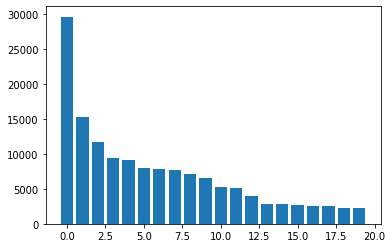

In [13]:
plt.bar(range(len(most_common_characters)), most_common_characters)
plt.show()

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
english_stopwords = set(stopwords.words('english'))

In [16]:
alice_words_clean = [words.lower() for words in alice_word if words.lower() not in english_stopwords]

In [17]:
collections.Counter(alice_words_clean).most_common(20)

[('said', 462),
 ('alice', 404),
 ('little', 129),
 ('one', 106),
 ('gutenberg', 93),
 ('know', 88),
 ('project', 87),
 ('like', 85),
 ('would', 83),
 ('went', 83),
 ('could', 78),
 ('queen', 76),
 ('thought', 74),
 ('time', 71),
 ('see', 70),
 ('well', 63),
 ('king', 63),
 ('turtle', 60),
 ('way', 58),
 ('began', 58)]

We would like to have the stem of each word (doing -> do)
we can use -> from nltk.stem.porter import *
We also have some artefacts -> alice is turn into alic (please see below) but although it not always return the gramatically correct form, it gives us a standart way to process our words.

In [19]:
PorterStemmer().stem('doing')

'do'

In [20]:
alice_words_stems = [PorterStemmer().stem(word) for word in alice_words_clean]

In [21]:
alice_words_stems

['project',
 'gutenberg',
 'alic',
 'adventur',
 'wonderland',
 'lewi',
 'carrol',
 'ebook',
 'use',
 'anyon',
 'anywher',
 'cost',
 'almost',
 'restrict',
 'whatsoev',
 'may',
 'copi',
 'give',
 'away',
 'use',
 'term',
 'project',
 'gutenberg',
 'licens',
 'includ',
 'ebook',
 'onlin',
 'www',
 'gutenberg',
 'org',
 'titl',
 'alic',
 'adventur',
 'wonderland',
 'author',
 'lewi',
 'carrol',
 'releas',
 'date',
 'june',
 '25',
 '2008',
 'ebook',
 '11',
 'last',
 'updat',
 'octob',
 '6',
 '2016',
 'languag',
 'english',
 'charact',
 'set',
 'encod',
 'utf',
 '8',
 'start',
 'project',
 'gutenberg',
 'ebook',
 'alic',
 'adventur',
 'wonderland',
 'produc',
 'arthur',
 'dibianca',
 'david',
 'widger',
 'alic',
 'adventur',
 'wonderland',
 'lewi',
 'carrol',
 'millennium',
 'fulcrum',
 'edit',
 '3',
 '0',
 'content',
 'chapter',
 'rabbit',
 'hole',
 'chapter',
 'ii',
 'pool',
 'tear',
 'chapter',
 'iii',
 'caucu',
 'race',
 'long',
 'tale',
 'chapter',
 'iv',
 'rabbit',
 'send',
 'littl',